In [1]:
import os
import pandas as pd
import re
from collections import Counter
import html
import matplotlib.pyplot as plt
import seaborn as sns
from metadata import ACL_metadata
from collections import defaultdict
from itertools import chain
import numpy as np
%matplotlib inline

In [2]:
acl = ACL_metadata()
auths = acl.auths
known = acl.known
known_f = acl.known_f
known_m = acl.known_m
unique_ids = acl.ids
new_unknown = acl.unk
df = acl.meta_df

In [3]:
print("{0} papers and {1} unique authors".format(df.shape[0],len(acl.auths)))
print("Average papers per authors {0:.2f}".format(df.shape[0]/len(acl.auths)))

23766 papers and 18379 unique authors
Average papers per authors 1.29


In [4]:
from collections import defaultdict
from itertools import chain
girls = defaultdict(set)
boys = defaultdict(set)
last_publ = defaultdict(int)
first_publ = defaultdict(int)
for i in range(1974,2015):
    year = df[df["year"] == i]
    auths = set(chain.from_iterable(year["authors"]))
    for a in auths:
        if first_publ[a] == 0:
            first_publ[a] = i
            last_publ[a] = i
            continue
       
        if last_publ[a]-first_publ[a] > 5:
            last_publ[a]=i
            first_publ[a]=i
            continue
        if last_publ[a] - first_publ[a] < 4:
            last_publ[a] = i
            continue
        last_publ[a] = i
       
        if a in known_f: 
            girls[i].add(a)
        elif a in known_m: 
            boys[i].add(a)
m = []
f = []
for i in range(1980,2015):
    m.append(len(boys[i]))
    f.append(len(girls[i]))
    

In [5]:
girls = defaultdict(set)
boys = defaultdict(set)
last_publ = defaultdict(int)
first_publ = defaultdict(int)
for i in range(1964,2015):
    year = df[df["year"] == i]
    auths = set(chain.from_iterable(year["authors"]))
    for a in auths:
        if first_publ[a] == 0:
            first_publ[a] = i
            last_publ[a] = i
            continue
       
        if last_publ[a]-first_publ[a] >10:
            last_publ[a]=i
            first_publ[a]=i
            continue
        if last_publ[a] - first_publ[a] < 9:
            last_publ[a] = i
            continue
        last_publ[a] = i
       
        if a in known_f: 
            girls[i].add(a)
        elif a in known_m: 
            boys[i].add(a)
m2 = []
f2 = []
for i in range(1980,2015):
    m2.append(len(boys[i]))
    f2.append(len(girls[i]))

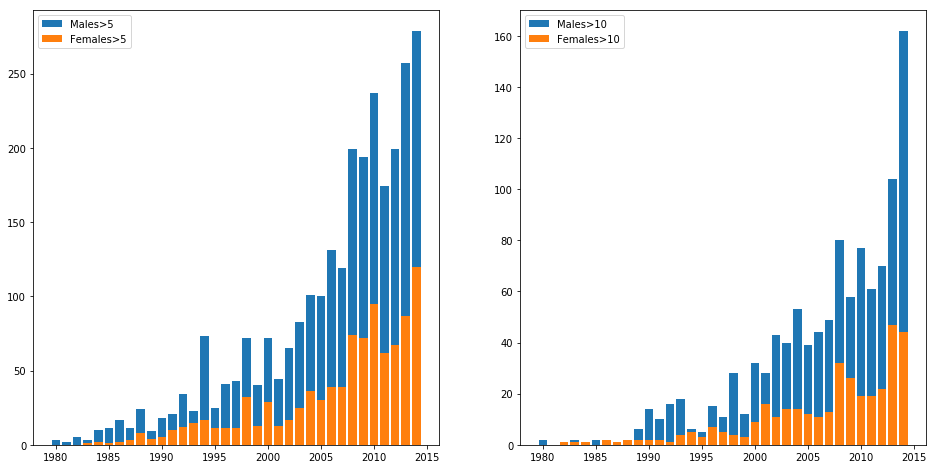

In [6]:
fix, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].bar(range(1980,2015),m,label="Males>5")
ax[0].bar(range(1980,2015),f,label="Females>5")
ax[1].bar(range(1980,2015),m2,label="Males>10")
ax[1].bar(range(1980,2015),f2,label="Females>10")
ax[0].legend()
ax[1].legend()
plt.savefig("plots/Active5-10years.pdf")
plt.show()

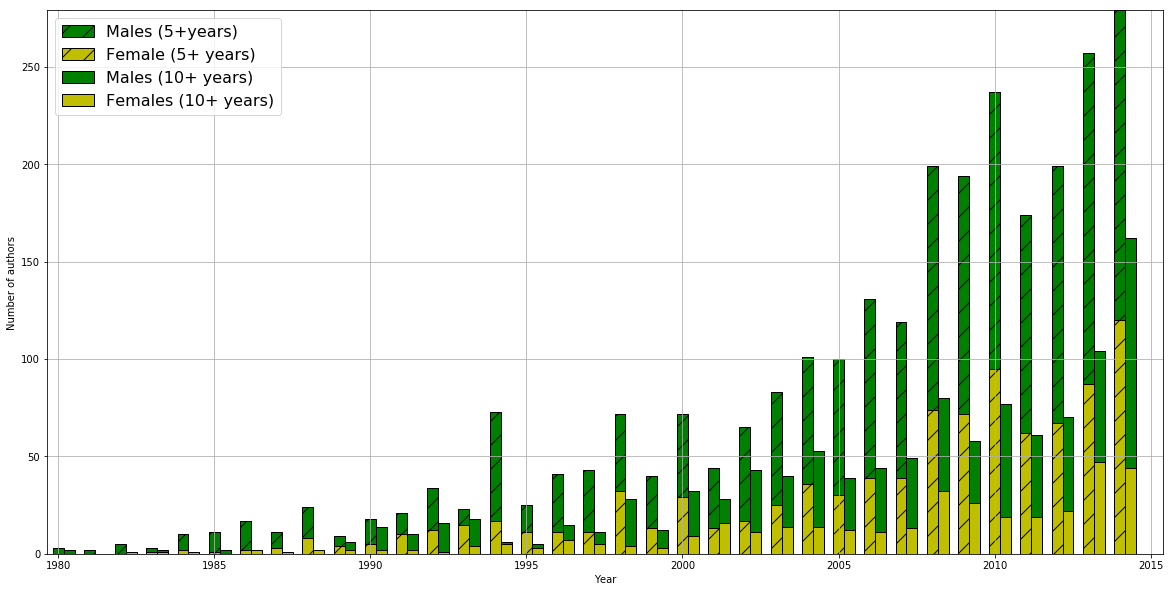

In [7]:
# Setting the positions and width for the bars
pos = list(range(1980,2015)) 
width = 0.35

patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

fig, ax = plt.subplots(figsize=(20,10))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        m,
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='g', 
        edgecolor="black",
        hatch=patterns[0],
        # with label the first value in first_name
        label="Males (5+years)") 

plt.bar(pos, 
        #using df['pre_score'] data,
        f,
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color 
        color='y', 
        edgecolor="black",
        hatch=patterns[0],
        # with label the first value in first_name
        label="Female (5+ years)") 

plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        m2,
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='g', 
        edgecolor="black",
        # with label the second value in first_name
        label="Males (10+ years)")

plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        f2,
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='y', 
        edgecolor="black",
        # with label the second value in first_name
        label="Females (10+ years)")



# Set the y axis label
ax.set_ylabel('Number of authors')

# Set the chart's title
ax.set_xlabel('Year')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(m+f)] )

# Adding the legend and showing the plot
plt.legend(loc=0, prop={'size': 16})
plt.grid()
plt.savefig("plots/CompareActiveYears.pdf",bbox_inches="tight")
plt.show()

In [40]:
from collections import defaultdict
from itertools import chain
girls = defaultdict(set)
boys = defaultdict(set)
last_publ = defaultdict(int)
first_publ = defaultdict(int)
for i in range(1974,2015):
    year = df[df["year"] == i]
    auths = set(chain.from_iterable(year["authors"]))
    for a in auths:
        if first_publ[a] == 0:
            first_publ[a] = i
            last_publ[a] = i
            continue
       
        if last_publ[a]-first_publ[a] > 5:
            last_publ[a]=i
            first_publ[a]=i
            continue
        if last_publ[a] - first_publ[a] < 4:
            last_publ[a] = i
            continue
        last_publ[a] = i
       
        if a in known_f: 
            girls[i].add(a)
        elif a in known_m: 
            boys[i].add(a)
m = []
f = []
for i in range(1980,2015):
    m.append(len(boys[i]))
    f.append(len(girls[i]))
    

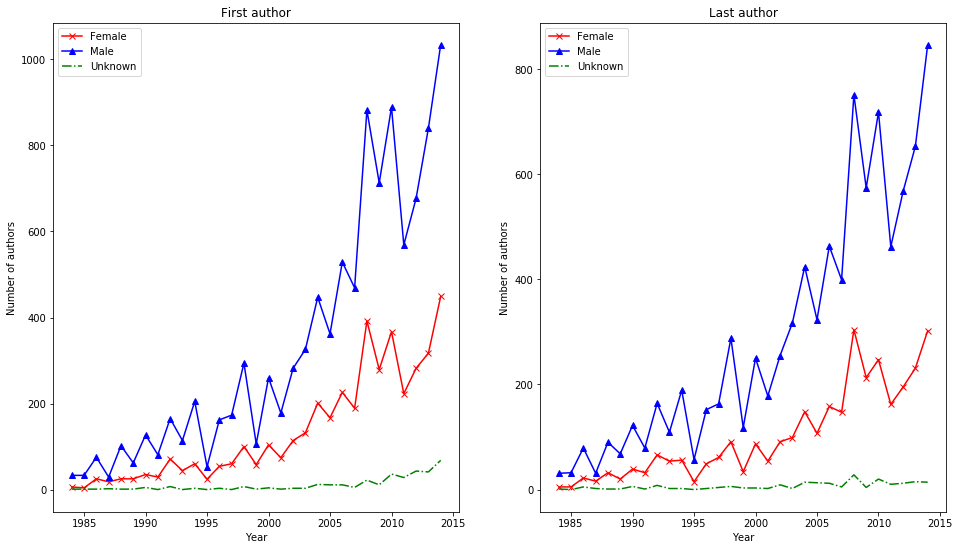

In [61]:
plt.figure()
yrs = []
x = []
y = []
z = []
for i in range(1984,2015):
    year = df[df["year"] == i]
    auths =year["authors"]
    yf=0
    ym=0
    yu=0
    seen = set()
    for b in auths:
        #print(b)
        if len(b)<=1:
            continue
        a = b[0]
        if a in seen:
            continue
        seen.add(a)
        if a in known_f: yf+=1
        elif a in known_m: ym+=1
        else: yu+=1
    yrs.append(i)
    x.append(yf)
    y.append(ym)
    z.append(yu)

fig, ax = plt.subplots(1,2,figsize=(16,9))
ax[0].plot(yrs,x,'-xr',label="Female")
ax[0].plot(yrs,y,'-^b',label="Male")
ax[0].plot(yrs,z,'-.g',label="Unknown")
ax[0].set_title("First author")
ax[0].legend()
ax[0].set_ylabel("Number of authors")
ax[0].set_xlabel("Year")

yrs = []
x2 = []
y2 = []
z2 = []
for i in range(1984,2015):
    seen = set()
    year = df[df["year"] == i]
    auths =year["authors"]
    yf=0
    ym=0
    yu=0
    for b in auths:
        #print(b)
        if len(b)<=1:
            continue
        a = b[-1]
        if a in seen:
            continue
        seen.add(a)
        if a in known_f: yf+=1
        elif a in known_m: ym+=1
        else: yu+=1
    yrs.append(i)
    x2.append(yf)
    y2.append(ym)
    z2.append(yu)
    
ax[1].plot(yrs,x2,'-xr',label="Female")
ax[1].plot(yrs,y2,'-^b',label="Male")
ax[1].plot(yrs,z2,'-.g',label="Unknown")
ax[1].set_title("Last author")
ax[1].set_ylabel("Number of authors")
ax[1].set_xlabel("Year")
ax[1].legend()

plt.savefig("plots/FirstLastAuth.pdf")
plt.show()

yrs = []
x3 = []
y3 = []
for i in range(1984,2015):
    year = df[df["year"] == i]
    auths =year["authors"]
    yf=0
    ym=0
    yu=0
    seen = set()
    for b in auths:
        #print(b)
        if len(b)!=1:
            continue
        a = b[0]
        if a in seen:
            continue
        seen.add(a)
        if a in known_f: yf+=1
        elif a in known_m: ym+=1
        else: yu+=1
    yrs.append(i)
    x3.append(yf)
    y3.append(ym)

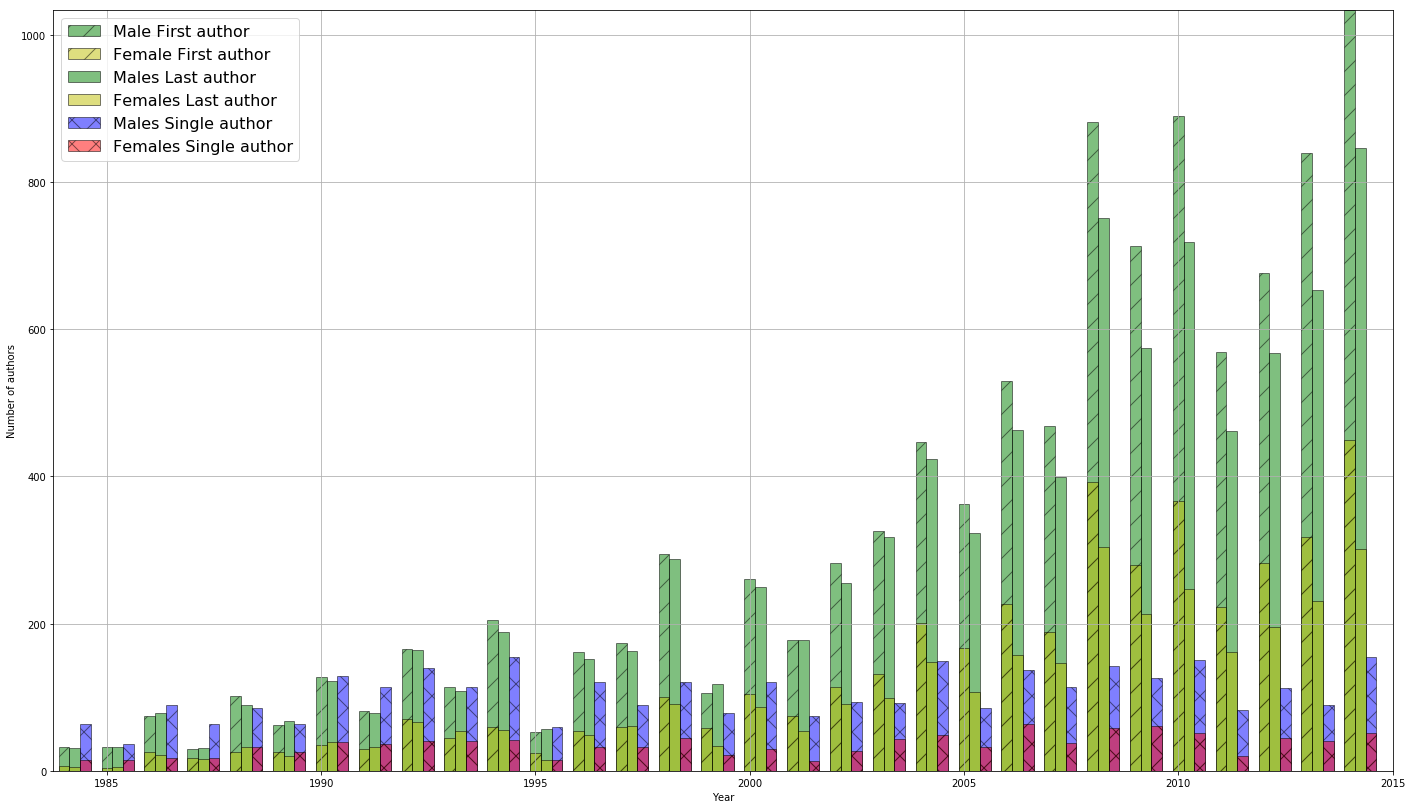

In [63]:
# Setting the positions and width for the bars
pos = list(range(1984,2015)) 
width = 0.25

patterns = [ "/" , "x" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

fig, ax = plt.subplots(figsize=(24,14))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        y,
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='g', 
        edgecolor="black",
        hatch=patterns[0],
        # with label the first value in first_name
        label="Male First author") 

plt.bar(pos, 
        #using df['pre_score'] data,
        x,
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color 
        color='y', 
        edgecolor="black",
        hatch=patterns[0],
        # with label the first value in first_name
        label="Female First author") 

plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        y2,
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='g', 
        edgecolor="black",
        # with label the second value in first_name
        label="Males Last author")

plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        x2,
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='y', 
        edgecolor="black",
        # with label the second value in first_name
        label="Females Last author")

plt.bar([p + width*2 for p in pos], 
        #using df['mid_score'] data,
        y3,
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='b', 
        edgecolor="black",
        hatch=patterns[1],
        # with label the second value in first_name
        label="Males Single author")

plt.bar([p + width*2 for p in pos], 
        #using df['mid_score'] data,
        x3,
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='r', 
        edgecolor="black",
        hatch=patterns[1],
        # with label the second value in first_name
        label="Females Single author")



# Set the y axis label
ax.set_ylabel('Number of authors')

# Set the chart's title
ax.set_xlabel('Year')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(x+y)] )

# Adding the legend and showing the plot
plt.legend(loc=0, prop={'size': 16})
plt.grid()
plt.savefig("plots/CompareFirstLast.pdf")
plt.show()